# task-1: Predictive Modeling

Build a regression model to predict the
aggregate rating of a restaurant based on
available features

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [3]:
data = pd.read_csv('Dataset(1).csv',encoding='unicode_escape')

In [6]:
data['Has Table Booking'] = data['Has Table booking'].map({'Yes':1,'No':0})
data['Has Online Delivery'] = data['Has Online delivery'].map({'Yes':1,'No':0})
print(data)

      ï»¿Restaurant ID           Restaurant Name  Country Code  \
0              6317637          Le Petit Souffle           162   
1              6304287          Izakaya Kikufuji           162   
2              6300002    Heat - Edsa Shangri-La           162   
3              6318506                      Ooma           162   
4              6314302               Sambo Kojin           162   
...                ...                       ...           ...   
9546           5915730              NamlÛ± Gurme           208   
9547           5908749         Ceviz Aï¿½ï¿½acÛ±           208   
9548           5915807                     Huqqa           208   
9549           5916112         Aï¿½ï¿½ï¿½k Kahve           208   
9550           5927402  Walter's Coffee Roastery           208   

                  City                                            Address  \
0          Makati City  Third Floor, Century City Mall, Kalayaan Avenu...   
1          Makati City  Little Tokyo, 2277 Chino Roce

Split the dataset into training and testing sets
and evaluate the model's performance using
appropriate metrics

In [16]:
X = data[['Average Cost for two','Has Table Booking','Has Online Delivery','Votes']]
y = data['Aggregate rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
mean_square = mean_squared_error(y_test,y_pred)
R_square=r2_score(y_test,y_pred)
print('mean squared error:',mean_square)
print('R-squared:',R_square)


mean squared error: 1.9397487670244156
R-squared: 0.14777861021467742


Experiment with different algorithms (e.g.,
linear regression, decision trees, random
forest) and compare their performance.

In [17]:
decision_tree = DecisionTreeRegressor(random_state=42)
random_forest = RandomForestRegressor(random_state=42)
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
y_pred_dt = decision_tree.predict(X_test)
y_pred_rf= random_forest.predict(X_test)
mean_square_dt = mean_squared_error(y_test,y_pred_dt)
mean_square_rf = mean_squared_error(y_test,y_pred_rf)
r2_dt = r2_score(y_test,y_pred_dt)
r2_rf = r2_score(y_test,y_pred_rf)
print('decision tree - mean square error:',mean_square_dt)
print('decision tree -R-squared:',r2_dt)
print('random forest - mean square error:',mean_square_rf)
print('random forest -Rsquared:',r2_rf)



decision tree - mean square error: 0.2196742107774391
decision tree -R-squared: 0.9034869543977462
random forest - mean square error: 0.14376990880218093
random forest -Rsquared: 0.9368352265140728


# task-2:Customer Preference Analysis

Analyze the relationship between the type of
cuisine and the restaurant's rating.


In [18]:
average_rating_by_cuisine = data.groupby('Cuisines')['Aggregate rating'].mean()
sorted_cuisine = average_rating_by_cuisine.sort_values(ascending = False)
print('top cuisines with high rating:')
print(sorted_cuisine.head(10))

top cuisines with high rating:
Cuisines
Italian, Deli               4.9
Hawaiian, Seafood           4.9
American, Sandwich, Tea     4.9
Continental, Indian         4.9
European, Asian, Indian     4.9
European, Contemporary      4.9
European, German            4.9
BBQ, Breakfast, Southern    4.9
American, Coffee and Tea    4.9
Sunda, Indonesian           4.9
Name: Aggregate rating, dtype: float64


Identify the most popular cuisines among
customers based on the number of votes.

In [23]:
cuisine_votes = data.groupby('Cuisines')['Votes'].sum()
most_popular_cuisines = cuisine_votes.nlargest(10)
print("Most Popular Cuisines based on Votes:")
print(most_popular_cuisines)

Most Popular Cuisines based on Votes:
Cuisines
North Indian, Mughlai             53747
North Indian                      46241
North Indian, Chinese             42012
Cafe                              30657
Chinese                           21925
North Indian, Mughlai, Chinese    20115
Fast Food                         17852
South Indian                      16433
Mughlai, North Indian             15275
Italian                           14799
Name: Votes, dtype: int64


Determine if there are any specific cuisines
that tend to receive higher ratings.

In [25]:
cuisine_ratings = data.groupby('Cuisines')['Aggregate rating'].mean()
print("Average Ratings by Cuisine:")
print(cuisine_ratings)

Average Ratings by Cuisine:
Cuisines
Afghani                                      0.725
Afghani, Mughlai, Chinese                    0.000
Afghani, North Indian                        0.000
Afghani, North Indian, Pakistani, Arabian    0.000
African                                      4.700
                                             ...  
Western, Asian, Cafe                         4.200
Western, Fusion, Fast Food                   3.200
World Cuisine                                4.900
World Cuisine, Mexican, Italian              4.400
World Cuisine, Patisserie, Cafe              4.200
Name: Aggregate rating, Length: 1825, dtype: float64


# Task-3: Data Visualization

Create visualizations to represent the distribution
of ratings using different charts (histogram, bar
plot, etc.)

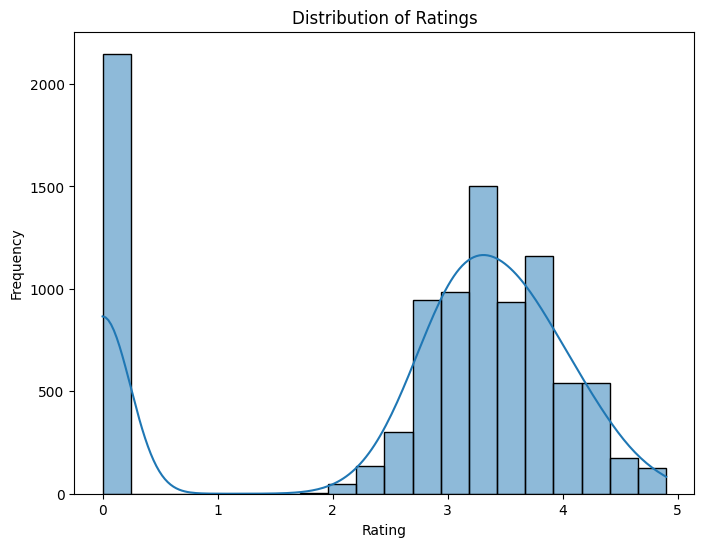

In [27]:
plt.figure(figsize=(8, 6))
sns.histplot(data['Aggregate rating'], bins=20, kde=True)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.show()

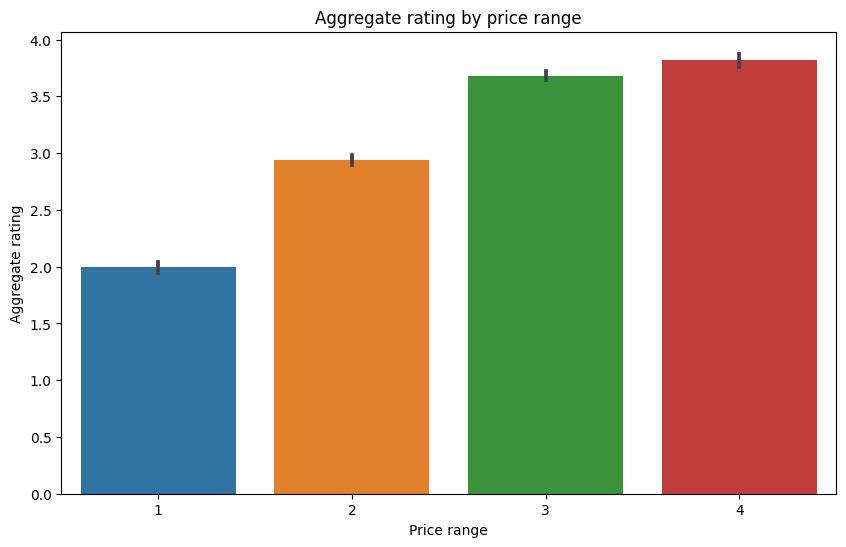

In [28]:
plt.figure(figsize=(10, 6))
sns.barplot(x = 'Price range', y ='Aggregate rating',data = data)
plt.xlabel('Price range')
plt.ylabel('Aggregate rating')
plt.title('Aggregate rating by price range')
plt.show()

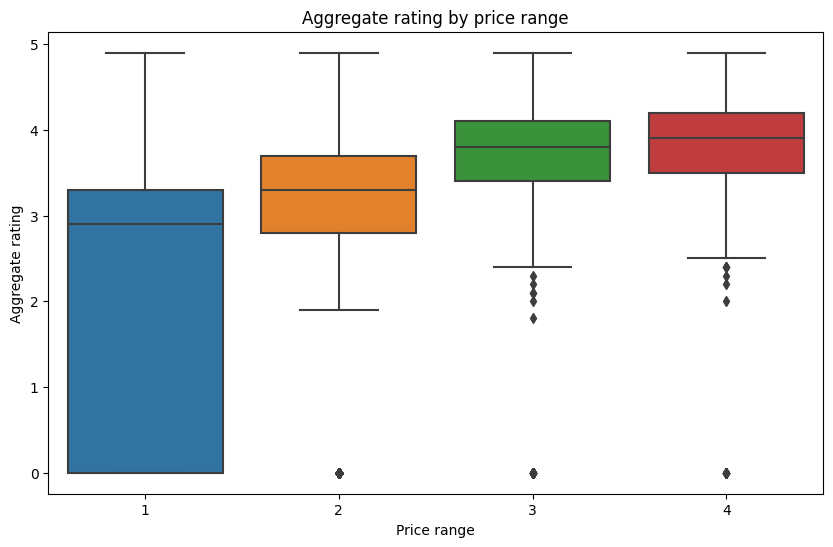

In [29]:
plt.figure(figsize=(10, 6))
sns.boxplot(x = 'Price range', y ='Aggregate rating',data = data)
plt.xlabel('Price range')
plt.ylabel('Aggregate rating')
plt.title('Aggregate rating by price range')
plt.show()

Compare the average ratings of different cuisines
or cities using appropriate visualizations

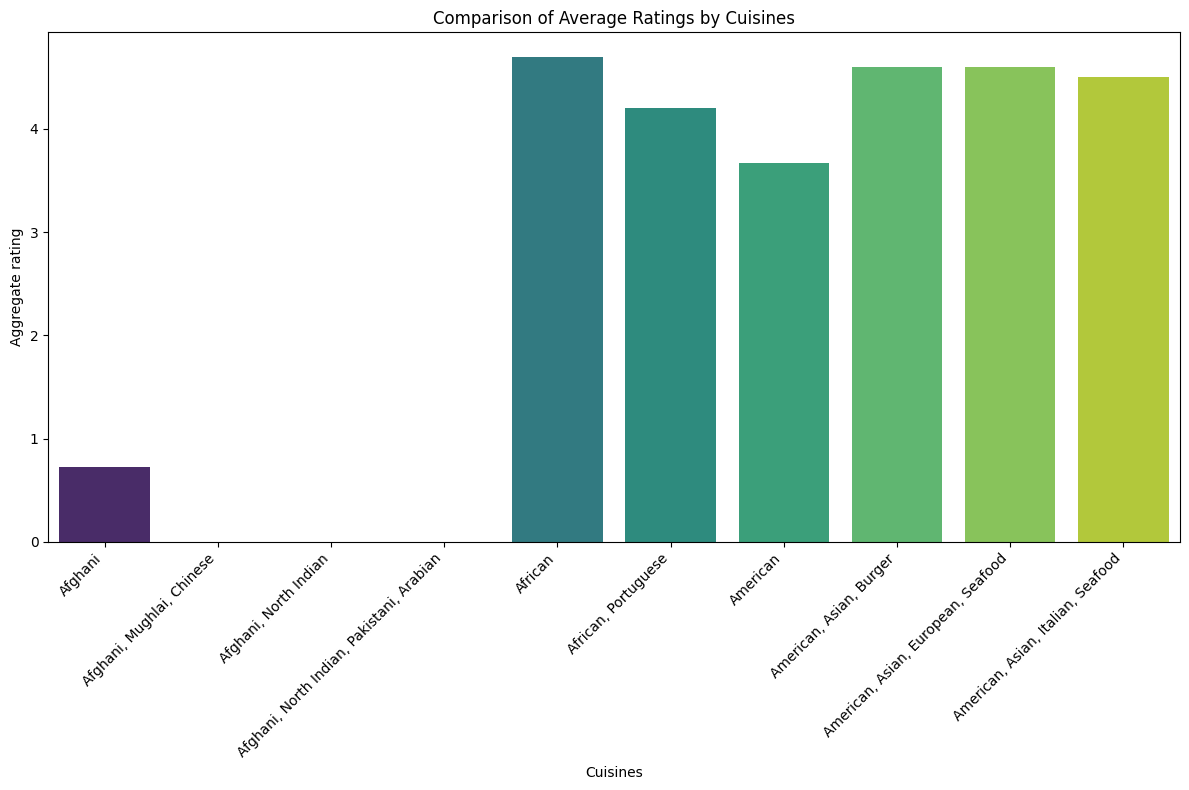

In [36]:
average_rating_by_cuisine = data.groupby('Cuisines')['Aggregate rating'].mean().reset_index()
sorted_cuisine = average_rating_by_cuisine.sort_values(by= 'Aggregate rating',ascending = False)
top_ten_cuisine =10
top_cuisine =average_rating_by_cuisine.head(top_ten_cuisine)
plt.figure(figsize=(12, 8))
sns.barplot(x='Cuisines', y='Aggregate rating', data=top_cuisine,palette = 'viridis')
plt.xlabel('Cuisines')
plt.ylabel('Aggregate rating')
plt.title('Comparison of Average Ratings by Cuisines')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()
plt.show()

Visualize the relationship between various
features and the target variable to gain insights.

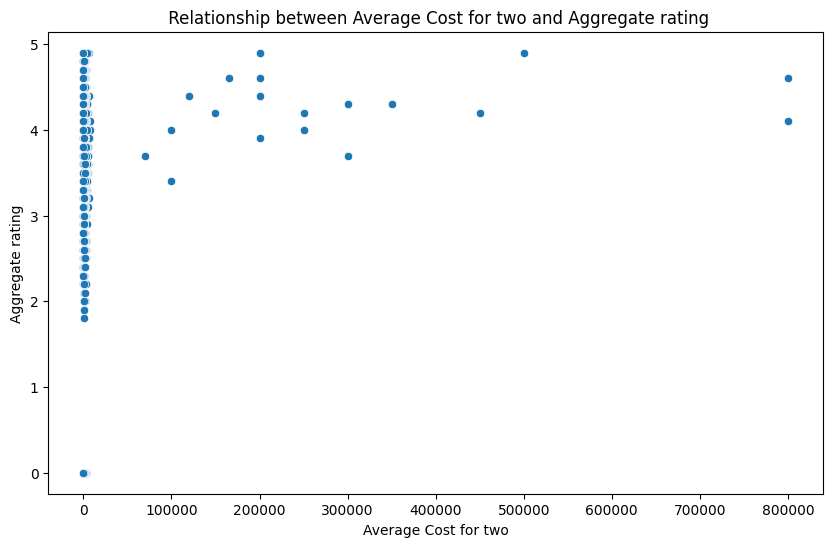

In [37]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Average Cost for two', y='Aggregate rating', data=data)
plt.xlabel('Average Cost for two')
plt.ylabel('Aggregate rating')
plt.title(' Relationship between Average Cost for two and Aggregate rating')
plt.show()

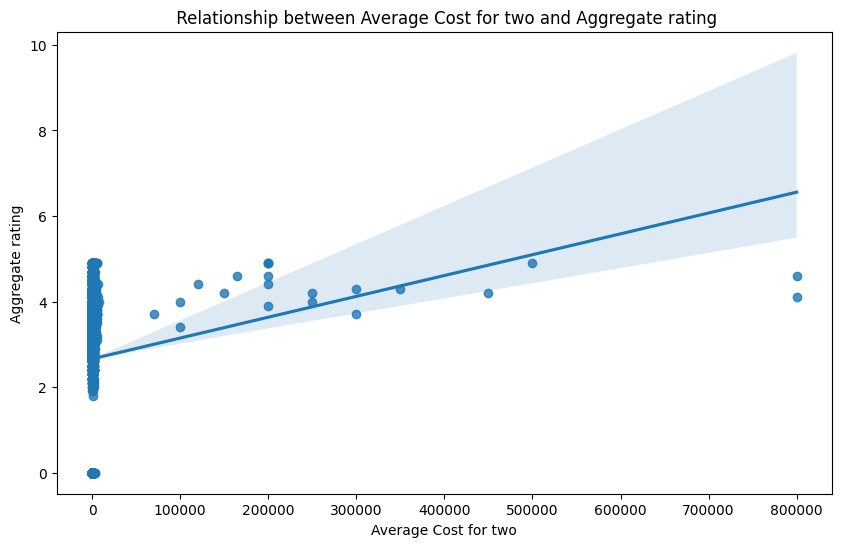

In [38]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Average Cost for two', y='Aggregate rating', data=data)
plt.xlabel('Average Cost for two')
plt.ylabel('Aggregate rating')
plt.title(' Relationship between Average Cost for two and Aggregate rating')
plt.show()

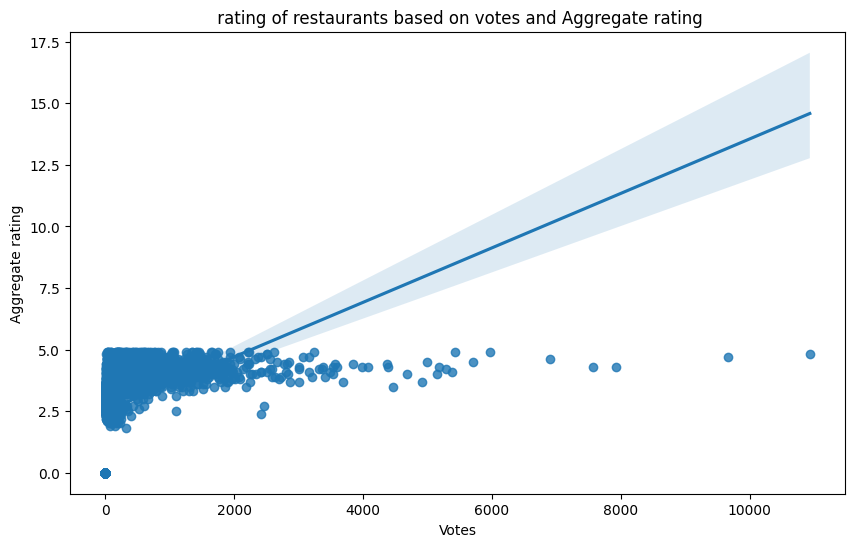

In [47]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Votes', y='Aggregate rating', data=data)
plt.xlabel('Votes')
plt.ylabel('Aggregate rating')
plt.title(' rating of restaurants based on votes and Aggregate rating')
plt.show()

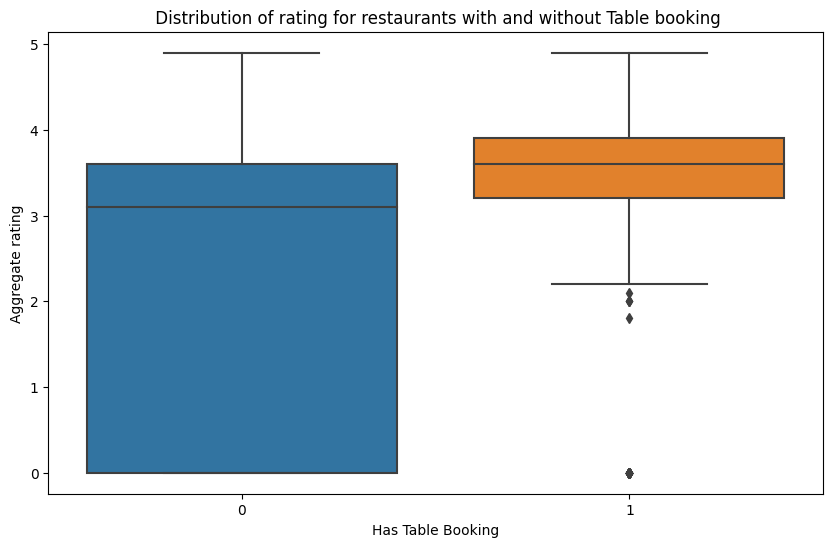

In [42]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Has Table Booking', y='Aggregate rating', data=data)
plt.xlabel('Has Table Booking')
plt.ylabel('Aggregate rating')
plt.title(' Distribution of rating for restaurants with and without Table booking')
plt.show()